In [104]:
import acoular
import numpy as np
from pathlib import Path

# define mic geometry
mic_geom = Path().resolve() / "bassoon_cage.xml"
assert mic_geom.exists()
mg = acoular.microphones.MicGeom(from_file = mic_geom)
# print(mg.num_mics)
# mg.mpos

# define analysing grid
rg = acoular.grids.RectGrid3D(x_min=-0.4, x_max=0.4, y_min=-0.4, y_max=0.4, z_min=-0.4, z_max=0.4, increment=0.02)
# rg.nxsteps

# create test point source(s)
testSourceSignal = acoular.signals.PNoiseGenerator(seed=1) # SignalGenerator(rms = 1, sample_freq = 44100, numsamples = 44100*1)
testSource = acoular.sources.PointSource(signal = testSourceSignal, mics = mg, loc = (0, 0.2, -0.1))

# beamformer initialisation
f = acoular.spectra.PowerSpectra(source=testSource, window='Hanning', overlap='50%', block_size=256)
st = acoular.fbeamform.SteeringVector(grid=rg, mics=mg, steer_type='true location')
b = acoular.fbeamform.BeamformerCleansc(freq_data=f, steer=st)

# calculate result for the 1kHz octave band
# map = acoular.spectra.synthetic(b,1000,1)
map = b.synthetic(1000, 1)



[('PointSource_91e8bed9c3ae68a0e181643339f52b51_cache.h5', 5)]


C:\Users\moinm\AppData\Local\Temp\ipykernel_33984\4205344285.py:27: Warning: Queried frequency band (707.107 to 1414.21 Hz) does not include any discrete FFT sample frequencies. Returning zeros.
  map = b.synthetic(1000, 1)


[('PointSource_91e8bed9c3ae68a0e181643339f52b51_cache.h5', 6)]


OverflowError: cannot convert float infinity to integer

AxisError: axis 2 is out of bounds for array of dimension 0

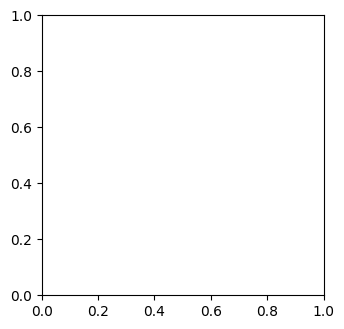

In [105]:
from pylab import colorbar, figure, imshow, show, subplot, title, xlabel, ylabel

fig = figure(1, (8, 8))

# plot the results

subplot(221)
map_z = np.sum(map, 2)
mx = acoular.L_p(map_z.max())
imshow(
    acoular.L_p(map_z.T),
    vmax=mx,
    vmin=mx - 20,
    origin='lower',
    interpolation='nearest',
    extent=(rg.x_min, rg.x_max, rg.y_min, rg.y_max),
)
xlabel('x')
ylabel('y')
title('Top view (xy)')

subplot(223)
map_y = np.sum(map, 1)
imshow(
    acoular.L_p(map_y.T),
    vmax=mx,
    vmin=mx - 20,
    origin='upper',
    interpolation='nearest',
    extent=(rg.x_min, rg.x_max, -rg.z_max, -rg.z_min),
)
xlabel('x')
ylabel('z')
title('Side view (xz)')

subplot(222)
map_x = np.sum(map, 0)
imshow(
    acoular.L_p(map_x),
    vmax=mx,
    vmin=mx - 20,
    origin='lower',
    interpolation='nearest',
    extent=(-rg.z_min, -rg.z_max, rg.y_min, rg.y_max),
)
xlabel('z')
ylabel('y')
title('Side view (zy)')
colorbar()

ax0 = fig.add_subplot((224), projection='3d')
ax0.scatter(mg.mpos[0], mg.mpos[1], -mg.mpos[2])
source_locs = np.array([testSource.loc, testSource.loc, testSource.loc]).T
ax0.scatter(source_locs[0], source_locs[1], -source_locs[2])
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('z')
ax0.set_title('Setup (mic and source positions)')
show()